# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import pandas as pd
df =pd.read_csv("compresive_strength_concrete.csv")
df.shape

(1030, 9)

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.isnull().sum(axis = 1)    #### No Null values found
                

0       0
1       0
2       0
3       0
4       0
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Length: 1030, dtype: int64

In [ ]:
df.corr()["Concrete compressive strength(MPa, megapascals) "]
## Observation: Cement (component 1)(kg in a m^3 mixture) has good correlation with Concrete compressive strength(MPa, megapascals)
## Superplasticizer (component 5)(kg in a m^3 mixture) has impact on Concrete compressive strength
## Age (day) also affect Concrete compressive strength(MPa, megapascals)

Cement (component 1)(kg in a m^3 mixture)                0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134829
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105755
Water  (component 4)(kg in a m^3 mixture)               -0.289633
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366079
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167241
Age (day)                                                0.328873
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

## Observation drawn from Correlation:
1.Cement (component 1)(kg in a m^3 mixture) has good correlation with Concrete compressive strength(MPa, megapascals)

2.Superplasticizer (component 5)(kg in a m^3 mixture) has impact on Concrete compressive strength

3.Age (day) also affect Concrete compressive strength(MPa, megapascals)

4.Fly Ash has negative correlation with Concrete compressive strength.

5.Also water quantity has negative correlation with compressive strength(inversely related with eachother). 

In [ ]:
import matplotlib.pyplot as plt

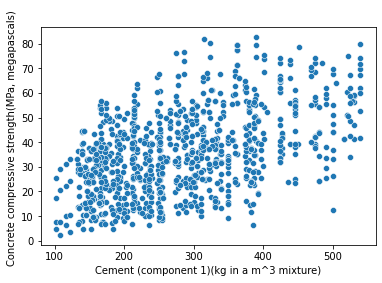

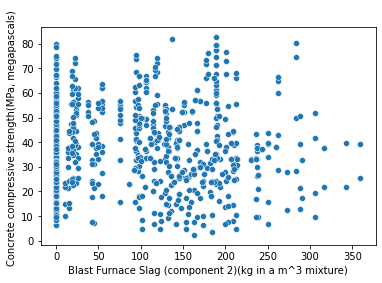

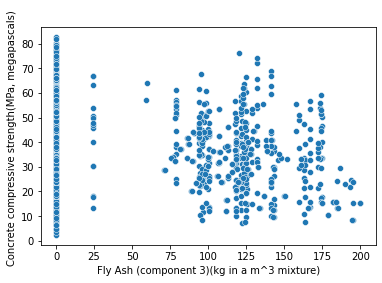

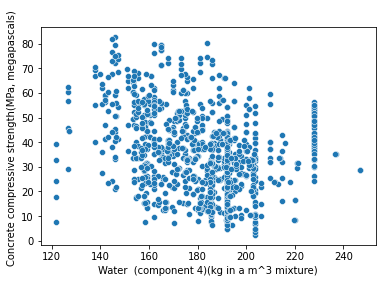

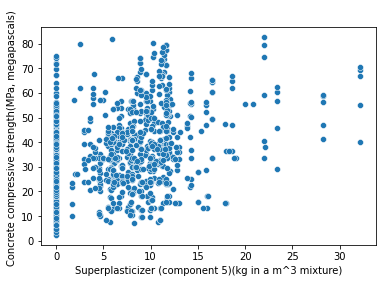

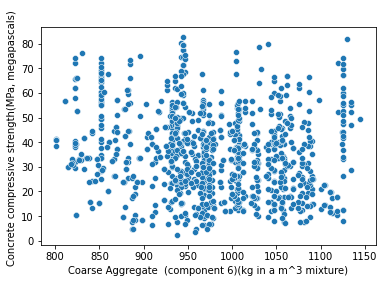

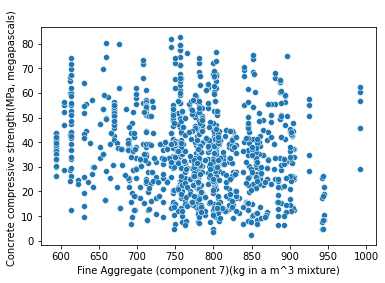

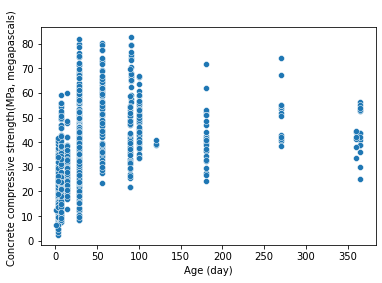

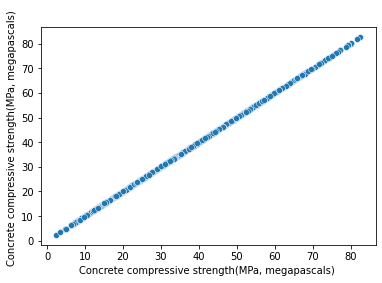

In [ ]:
import seaborn as sns
for x in col_to_plot:
    sns.scatterplot(x=df[x],y=df['Concrete compressive strength(MPa, megapascals) '])
    plt.show()

#Observation from the scatterplots
1.The compressive cement strength decreases as the amount of fly ash increases.  
2.The compressive cement strength increases as the amount of cement increases.

3.The concrete strength is getting low as the amount of water increases.


In [ ]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Removing Outliers

In [ ]:
df = df[df['Cement (component 1)(kg in a m^3 mixture)']<400].reset_index(drop=True)

In [ ]:
df=df[df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']<260].reset_index(drop=True)

In [ ]:
df=df[df['Fly Ash (component 3)(kg in a m^3 mixture)']<190].reset_index(drop=True)

In [ ]:
df=df[(df[ 'Water  (component 4)(kg in a m^3 mixture)']>140)  & (df[ 'Water  (component 4)(kg in a m^3 mixture)'] < 230)].reset_index(drop=True)

In [ ]:
df=df[df['Superplasticizer (component 5)(kg in a m^3 mixture)']<20]

In [ ]:
df=df[df['Fine Aggregate (component 7)(kg in a m^3 mixture)']<920]
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
4,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
...,...,...,...,...,...,...,...,...,...
834,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
835,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
836,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
837,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = df.iloc[:,:-1] # Features 
y = df.iloc[:,-1] # Target 
X=np.array(X)
y=np.array(y)

In [ ]:
### Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.2
ratio_test = 0.3

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(X, y, test_size=ratio_test, random_state =2)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

Standardized the Input Variables. Hint: Centeralized the data
We Standardized the input data to remove multicollinearity. 

In [ ]:
### Normalizing the  Data
mean = X_train.mean(axis = 0)
X_train = X_train- mean
std = X_train.std(axis =0) + 0.000000001                          
X_train /= std           # normalizing train data   

X_test -= mean          # normalizing test data
X_test /= std

X_val -= mean            # normalizing validation data
X_val /= std

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(406, 8)
(406,)
(163, 8)
(244,)
(163, 8)
(163,)


In [ ]:
#Model:input Layer (No. of features ),3 hidden layers including 10,8,6 unit & Output Layer 
#with activation function relu/tanh (check by experiment).

####5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
import tensorflow as tf


def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )),
    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers

  model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mae'])
  return model

In [ ]:


### 6.Train the Model with Epochs (100) and validate it
all_scores =[]
all_mae_histories = []

num_epochs =90

model = build_model()
history =model.fit(X_train, y_train, validation_data=(X_val,y_val),
epochs=num_epochs, batch_size=16, verbose=1)



Epoch 1/90
26/26 [==============================] - 1s 9ms/step - loss: 1170.4662 - mae: 30.6217 - val_loss: 550.3030 - val_mae: 18.8143
Epoch 2/90
26/26 [==============================] - 0s 4ms/step - loss: 372.6867 - mae: 15.6132 - val_loss: 197.5682 - val_mae: 11.5994
Epoch 3/90
26/26 [==============================] - 0s 4ms/step - loss: 188.2163 - mae: 11.3298 - val_loss: 176.1240 - val_mae: 10.9303
Epoch 4/90
26/26 [==============================] - 0s 4ms/step - loss: 163.2780 - mae: 10.2886 - val_loss: 165.6237 - val_mae: 10.6244
Epoch 5/90
26/26 [==============================] - 0s 3ms/step - loss: 149.1458 - mae: 9.8865 - val_loss: 155.6754 - val_mae: 10.2982
Epoch 6/90
26/26 [==============================] - 0s 3ms/step - loss: 144.4208 - mae: 9.6877 - val_loss: 152.5444 - val_mae: 9.9493
Epoch 7/90
26/26 [==============================] - 0s 3ms/step - loss: 145.6368 - mae: 9.5371 - val_loss: 139.8514 - val_mae: 9.6330
Epoch 8/90
26/26 [==============================] - 

In [ ]:
model.summary()
hist_dic =history.history
hist_dic.keys()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 13,633
Trainable params: 13,633
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

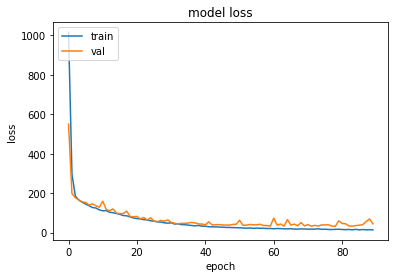

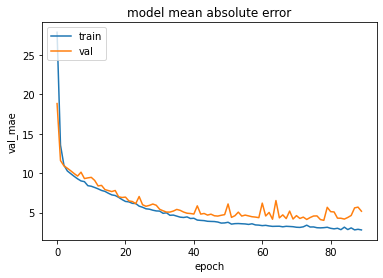

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()
plt.figure()
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('val_mae')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [ ]:
model = build_model()

test_mse,test_mae = model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 3140.6067 - mae: 54.0948


In [ ]:
resut=model.predict(x_test)
result[0:11]

array([[192.67651],
       [194.98383],
       [195.15889],
       [195.20099],
       [193.19589],
       [195.43802],
       [194.54546],
       [193.03177],
       [193.18997],
       [192.16707],
       [196.21054]], dtype=float32)

In [ ]:
y_test[0:11]

array([24.85, 28.24, 34.29, 31.35, 39.59, 37.91, 10.39, 38.61, 31.81,
       13.29, 34.49])